In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 16s 4us/step


In [5]:
print("x_train shape: {}, y_train shape: {}".format(x_train.shape, y_train.shape))

x_train shape: (60000, 28, 28), y_train shape: (60000,)


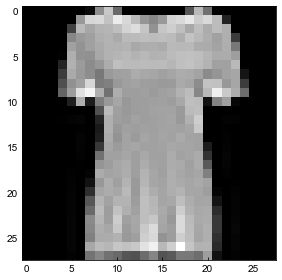

In [9]:
plt.imshow(x_train[10], cmap='gray')

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [21]:
x_train = x_train.reshape(len(x_train), 28*28)
x_val = x_val.reshape(len(x_val), 28*28)

In [22]:
print(x_train.shape)
print(x_val.shape)

(54000, 784)
(6000, 784)


In [12]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255

In [13]:
print(y_val)

[9 3 7 ... 5 2 9]


In [14]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [45]:
model = Sequential()
model.add(Dense(units=250, activation='relu', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [48]:
early_stopping = EarlyStopping()
hist = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 22s 414us/step - loss: 0.3981 - acc: 0.8550 - val_loss: 0.3434 - val_acc: 0.8740
Epoch 2/100
54000/54000 [==============================] - 22s 412us/step - loss: 0.3461 - acc: 0.8739 - val_loss: 0.3356 - val_acc: 0.8758
Epoch 3/100
54000/54000 [==============================] - 24s 437us/step - loss: 0.3191 - acc: 0.8815 - val_loss: 0.3385 - val_acc: 0.8737


In [49]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.3385, final accuracy: 0.8737


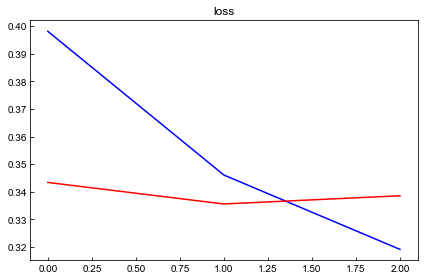

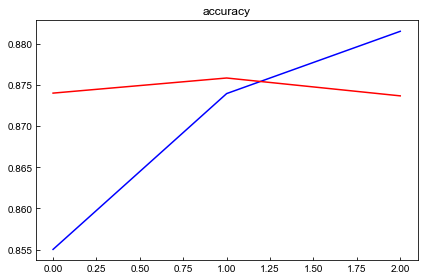

In [50]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.title('loss')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.title('accuracy')
plt.show()

In [51]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
pprint(cm)

array([[487,   0,  10,  15,   6,   0,  63,   0,   3,   0],
       [  0, 590,   0,   6,   2,   1,   2,   0,   0,   0],
       [  1,   0, 454,   4,  60,   0, 102,   0,   2,   0],
       [ 20,   4,   9, 526,  42,   0,   9,   0,   4,   0],
       [  1,   1,  29,   9, 520,   0,  52,   0,   1,   0],
       [  1,   0,   0,   0,   0, 577,   0,   6,   0,   2],
       [ 84,   0,  31,   8,  22,   0, 434,   0,   4,   0],
       [  0,   0,   0,   0,   0,  37,   0, 526,   2,  15],
       [  1,   0,   3,   0,   7,   0,   7,   0, 602,   0],
       [  0,   0,   0,   0,   0,  42,   0,  26,   2, 526]], dtype=int64)


In [87]:
y_hat = model.predict(df_test.values, batch_size=64)
y_pred = np.argmax(y_hat,axis=1)

In [88]:
with open('submission.csv', 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))